In [1]:
# image download
import xml.etree.ElementTree as ET
import requests
import os
import concurrent.futures

selected_classes = [
    'flower.npy',
    'bat.npy',
    'lightning.npy',
    'umbrella.npy',
    'dumbbell.npy',
    'flip flops.npy',
    'bush.npy',
    'nail.npy',
    'bridge.npy',
    'bread.npy',
    'leg.npy',
    'tree.npy',
    'cow.npy',
    'telephone.npy',
    'cup.npy',
    'bicycle.npy',
    'light bulb.npy',
    'crown.npy',
    'mouth.npy',
    'motorbike.npy',
    'tooth.npy',
    'school bus.npy',
    'cactus.npy',
    'spoon.npy',
    'camel.npy',
    'helicopter.npy',
    'river.npy',
    'bird.npy',
    'butterfly.npy',
    'backpack.npy',
    'table.npy',
    'hot air balloon.npy',
    'camera.npy',
    'hat.npy',
    'candle.npy',
    'bucket.npy',
    'beard.npy',
    'banana.npy',
    'eye.npy',
    'sock.npy',
    'book.npy',
    'pillow.npy',
    'foot.npy',
    'flashlight.npy',
    'crab.npy',
    'fish.npy',
    'pencil.npy',
    'leaf.npy',
    'elbow.npy',
    'donut.npy'
]


def fetch_xml(xml_url):
    response = requests.get(xml_url)
    if response.status_code != 200:
        return None
    return response.content

def parse_xml(xml_content, selected_files):
    root = ET.fromstring(xml_content)
    namespace = {'s3': 'http://doc.s3.amazonaws.com/2006-03-01'}
    base_url = "https://storage.googleapis.com/quickdraw_dataset/"

    file_urls = []
    for content in root.findall(".//s3:Contents", namespace):
        key = content.find("s3:Key", namespace).text
        file_name = os.path.basename(key)
        if file_name in selected_files:
            file_urls.append(base_url + key)
    return file_urls

def download_file(file_url, download_folder):
    file_path = os.path.join(download_folder, os.path.basename(file_url))
    if os.path.exists(file_path):
        return
    response = requests.get(file_url)
    if response.status_code == 200:
        with open(file_path, "wb") as f:
            f.write(response.content)

def download_npz_files(xml_url, download_folder, selected_files):
    if not os.path.exists(download_folder):
        os.makedirs(download_folder)

    xml_content = fetch_xml(xml_url)
    if xml_content is None:
        print("Failed to fetch XML.")
        return

    file_urls = parse_xml(xml_content, selected_files)
    print("Files to download:", file_urls)

    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        executor.map(lambda url: download_file(url, download_folder), file_urls)

xml_url = "https://storage.googleapis.com/quickdraw_dataset/"
download_folder = "image_folder"
download_npz_files(xml_url, download_folder, selected_classes)


Files to download: ['https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/backpack.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bat.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/beard.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bicycle.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bread.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bridge.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bucket.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bush.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/butterfly.npy', 'https://stor

In [2]:
#storokes download
import xml.etree.ElementTree as ET
import requests
import os
import concurrent.futures


selected_classes = [
    'flower.npz',
    'bat.npz',
    'lightning.npz',
    'umbrella.npz',
    'dumbbell.npz',
    'flip flops.npz',
    'bush.npz',
    'nail.npz',
    'bridge.npz',
    'bread.npz',
    'leg.npz',
    'tree.npz',
    'cow.npz',
    'telephone.npz',
    'cup.npz',
    'bicycle.npz',
    'light bulb.npz',
    'crown.npz',
    'mouth.npz',
    'motorbike.npz',
    'tooth.npz',
    'school bus.npz',
    'cactus.npz',
    'spoon.npz',
    'camel.npz',
    'helicopter.npz',
    'river.npz',
    'bird.npz',
    'butterfly.npz',
    'backpack.npz',
    'table.npz',
    'hot air balloon.npz',
    'camera.npz',
    'hat.npz',
    'candle.npz',
    'bucket.npz',
    'beard.npz',
    'banana.npz',
    'eye.npz',
    'sock.npz',
    'book.npz',
    'pillow.npz',
    'foot.npz',
    'flashlight.npz',
    'crab.npz',
    'fish.npz',
    'pencil.npz',
    'leaf.npz',
    'elbow.npz',
    'donut.npz'
]

def fetch_xml(xml_url):
    response = requests.get(xml_url)
    if response.status_code != 200:
        print(f"Failed to fetch XML: {response.status_code}")
        return None
    return response.content

def parse_xml(xml_content, selected_files):
    root = ET.fromstring(xml_content)
    namespace = {'s3': 'http://doc.s3.amazonaws.com/2006-03-01'}
    base_url = "https://storage.googleapis.com/quickdraw_dataset/"

    file_urls = []
    for content in root.findall(".//s3:Contents", namespace):
        key = content.find("s3:Key", namespace).text
        file_name = os.path.basename(key)
        if key.startswith("sketchrnn/") and file_name in selected_files:
            file_urls.append(base_url + key)
    return file_urls

def download_file(file_url, download_folder):
    file_path = os.path.join(download_folder, os.path.basename(file_url))
    if os.path.exists(file_path):
        print(f"Already exists: {file_path}")
        return

    print(f"Downloading: {file_url}")
    response = requests.get(file_url)
    if response.status_code == 200:
        with open(file_path, "wb") as f:
            f.write(response.content)
    else:
        print(f"Failed to download: {file_url}")

def download_npz_files(xml_url, download_folder, selected_files):
    if not os.path.exists(download_folder):
        os.makedirs(download_folder)

    xml_content = fetch_xml(xml_url)
    if xml_content is None:
        return

    file_urls = parse_xml(xml_content, selected_files)

    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        executor.map(lambda url: download_file(url, download_folder), file_urls)

# Run the downloader
xml_url = "https://storage.googleapis.com/quickdraw_dataset?prefix=sketchrnn/"
download_folder = "strokes_data"
download_npz_files(xml_url, download_folder, selected_classes)


Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/banana.npz
Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/backpack.npz
Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/bat.npz
Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/beard.npz
Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/bird.npz
Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/bicycle.npz
Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/book.npz
Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/bread.npz
Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/bridge.npz
Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/bucket.npz
Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/bush.npz
Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/butterfly.npz
Downloadi

In [4]:
# all import necesary
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, LSTM, Conv2D, MaxPooling2D,
    Flatten, Dense, Dropout, Concatenate
)
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import (
    ModelCheckpoint, EarlyStopping
)

MAX_SEQ_LEN        = 130
STROKE_FEATURES    = 3
IMG_HEIGHT, IMG_WIDTH = 28, 28
IMG_CHANNELS       = 1
NUM_CLASSES        = None
SAMPLES_PER_CLASS  = 10_000
DATA_DIR_STROKES   = 'strokes_data'
DATA_DIR_IMAGES    = 'image_folder'
VALIDATION_SPLIT   = 0.1
BATCH_SIZE         = 128
EPOCHS             = 15


In [5]:
def preprocess_stroke(stroke, max_len=MAX_SEQ_LEN):
    stroke = stroke.astype(np.float32)
    stroke[:,0] = np.cumsum(stroke[:,0])  # make x like absolute from delta
    stroke[:,1] = np.cumsum(stroke[:,1])  # same do for y also
    stroke[:,0] -= stroke[:,0].mean()     # center x to 0
    stroke[:,1] -= stroke[:,1].mean()     # center y to 0 again
    if len(stroke) > max_len:
        return stroke[:max_len]           # if too long, cut itt
    pad = np.zeros((max_len - len(stroke), STROKE_FEATURES), dtype=np.float32)
    return np.vstack([stroke, pad])       # else just fill with zero

def load_hybrid_data(N=SAMPLES_PER_CLASS):
    img_files_full    = sorted(f for f in os.listdir(DATA_DIR_IMAGES)   if f.endswith('.npy'))
    stroke_files_full = sorted(f for f in os.listdir(DATA_DIR_STROKES)  if f.endswith('.npz'))
    img_names    = {os.path.splitext(f)[0] for f in img_files_full}
    stroke_names = {os.path.splitext(f)[0] for f in stroke_files_full}
    common       = sorted(img_names & stroke_names)[:NUM_CLASSES]

    X_img_list, X_str_list, y_list = [], [], []
    for idx, cls in enumerate(common):
        img_arr = np.load(
            os.path.join(DATA_DIR_IMAGES, f"{cls}.npy"),
            allow_pickle=True, encoding='latin1'
        )[:N]
        img_arr = img_arr.reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS).astype('float32')/255.
        X_img_list.append(img_arr)

        data = np.load(
            os.path.join(DATA_DIR_STROKES, f"{cls}.npz"),
            allow_pickle=True, encoding='latin1'
        )
        strokes = data['train'][:N]
        proc = np.stack([preprocess_stroke(s) for s in strokes], axis=0)
        X_str_list.append(proc)

        y_list.append(np.full((N,), idx, dtype=np.int32))  #  putting labels same for each class

    X_img = np.concatenate(X_img_list, axis=0)
    X_str = np.concatenate(X_str_list, axis=0)
    y     = np.concatenate(y_list, axis=0)
    X_img, X_str, y = shuffle(X_img, X_str, y, random_state=42)  #  mix everything randomly

    true_num_classes = len(common)
    y_cat = to_categorical(y, num_classes=true_num_classes)
    return (X_str, X_img), y_cat


In [6]:
from tensorflow.keras.layers import (
    Input, LSTM, Conv1D, Conv2D, GlobalAveragePooling1D, GlobalAveragePooling2D,
    Dense, Dropout, Multiply, Add, Reshape, Activation, Softmax, Permute, Lambda
)
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

def attention_fusion(stroke_feat, image_feat):
    # Project both modalities to same dimension
    d = 128
    stroke_proj = Dense(d, activation='tanh')(stroke_feat)
    image_proj  = Dense(d, activation='tanh')(image_feat)
    
    # Learnable attention weights
    attn_score = Add()([stroke_proj, image_proj])
    attn_score = Dense(2)(attn_score)  # two modalities
    attn_weights = Softmax()(attn_score)

    # Split attention weights
    stroke_weight = Lambda(lambda x: x[:, 0:1])(attn_weights)
    image_weight  = Lambda(lambda x: x[:, 1:2])(attn_weights)

    # Weighted sum of features
    fused = Add()([
        Multiply()([stroke_feat, stroke_weight]),
        Multiply()([image_feat, image_weight])
    ])
    return fused

def build_lstm_fcn_model():
    # Stroke input: LSTM-FCN
    inp_str = Input(shape=(MAX_SEQ_LEN, STROKE_FEATURES), name='stroke_input')

    # LSTM branch
    lstm_out = LSTM(128)(inp_str)

    # FCN branch
    conv1 = Conv1D(128, kernel_size=8, padding='same', activation='relu')(inp_str)
    conv2 = Conv1D(256, kernel_size=5, padding='same', activation='relu')(conv1)
    conv3 = Conv1D(128, kernel_size=3, padding='same', activation='relu')(conv2)
    fcn_out = GlobalAveragePooling1D()(conv3)

    # Combine LSTM and FCN outputs
    stroke_feat = Add()([lstm_out, fcn_out])  # Optional: Concatenate() or Add()

    # Image input: Fully Convolutional layers
    inp_img = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), name='image_input')
    z = Conv2D(64, (3, 3), activation='relu', padding='same')(inp_img)
    z = Conv2D(128, (3, 3), activation='relu', padding='same')(z)
    z = Conv2D(256, (3, 3), activation='relu', padding='same')(z)
    z = GlobalAveragePooling2D()(z)
    image_feat = Dense(128, activation='relu')(z)

    # Attention-based fusion
    fused = attention_fusion(stroke_feat, image_feat)

    # Final classification
    fused = Dropout(0.5)(fused)
    fused = Dense(128, activation='relu')(fused)
    output = Dense(NUM_CLASSES, activation='softmax')(fused)

    return Model(inputs=[inp_str, inp_img], outputs=output, name='lstm_fcn_attention_hybrid')

In [7]:
# load data
(X_str, X_img), y = load_hybrid_data(N=SAMPLES_PER_CLASS)
NUM_CLASSES = y.shape[1]
total = X_img.shape[0]
split = int((1 - VALIDATION_SPLIT) * total)

# trian test split
X_str_train, X_str_val = X_str[:split], X_str[split:]
X_img_train, X_img_val = X_img[:split], X_img[split:]
y_train,     y_val     = y[:split],    y[split:]


In [9]:
# build and trian model
model = build_lstm_fcn_model()
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    ModelCheckpoint("best_hybrid_model.keras",
                    monitor="val_accuracy",
                    save_best_only=True),
    EarlyStopping(monitor="val_loss",
                  patience=5,
                  restore_best_weights=True)
]


Model: "lstm_fcn_attention_hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ stroke_input (InputLayer) │ (None, 130, 3)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ image_input (InputLayer)  │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 130, 128)       │          3,200 │ stroke_input[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 28, 28, 64)     │            640 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 130, 256)       │        164,096 │ conv1d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 28, 28, 128)    │         73,856 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 130, 128)       │         98,432 │ conv1d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 28, 28, 256)    │        295,168 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 128)            │         67,584 │ stroke_input[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 128)            │              0 │ conv1d_5[0][0]         │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 256)            │              0 │ conv2d_5[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 128)            │              0 │ lstm_1[0][0],          │
│                           │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │         32,896 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 128)            │         16,512 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 128)            │         16,512 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 128)            │              0 │ dense_7[0][0],         │
│                           │                        │                │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 2)              │            258 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ softmax_1 (Softmax)  

 Total params: 792,116 (3.02 MB)

 Trainable params: 792,116 (3.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    [X_str_train, X_img_train], y_train,
    validation_data=([X_str_val, X_img_val], y_val),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/15


I0000 00:00:1748625236.754943     116 cuda_dnn.cc:529] Loaded cuDNN version 90300


3516/3516 ━━━━━━━━━━━━━━━━━━━━ 222s 61ms/step - accuracy: 0.2044 - loss: 2.9369 - val_accuracy: 0.7705 - val_loss: 0.7688
Epoch 2/15
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 214s 61ms/step - accuracy: 0.7268 - loss: 0.9104 - val_accuracy: 0.8567 - val_loss: 0.4685
Epoch 3/15
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 213s 61ms/step - accuracy: 0.7986 - loss: 0.6629 - val_accuracy: 0.8838 - val_loss: 0.3759
Epoch 4/15
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 213s 61ms/step - accuracy: 0.8290 - loss: 0.5602 - val_accuracy: 0.9037 - val_loss: 0.3153
Epoch 5/15
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 213s 61ms/step - accuracy: 0.8474 - loss: 0.4959 - val_accuracy: 0.9065 - val_loss: 0.2951
Epoch 6/15
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 213s 61ms/step - accuracy: 0.8624 - loss: 0.4505 - val_accuracy: 0.9145 - val_loss: 0.2683
Epoch 7/15
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 213s 61ms/step - accuracy: 0.8722 - loss: 0.4148 - val_accuracy: 0.9237 - val_loss: 0.2459
Epoch 8/15
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 213s 61ms/step - accuracy: 0.8812 - lo

In [11]:
from tensorflow.keras.models import load_model

model = load_model("best_hybrid_model.keras")


# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     initial_epoch=15,  # (optional)
#     epochs=30,
#     batch_size=256,
#     callbacks=callbacks
# )

history = model.fit(
    [X_str_train, X_img_train], y_train,
    validation_data=([X_str_val, X_img_val], y_val),
    batch_size=BATCH_SIZE,
    initial_epoch=15,
    epochs=20,
    callbacks=callbacks
)

ValueError: The `{arg_name}` of this `Lambda` layer is a Python lambda. Deserializing it is unsafe. If you trust the source of the config artifact, you can override this error by passing `safe_mode=False` to `from_config()`, or calling `keras.config.enable_unsafe_deserialization().

In [12]:
class_names = sorted([f[:-4] for f in os.listdir(DATA_DIR_IMAGES) if f.endswith('.npy')])[:y.shape[1]]


In [13]:
len(class_names)

50

In [18]:
# testing with random 5 examples to see infernece
import time

model.load_weights("best_hybrid_model.keras")

num_test = 5
test_str = X_str_val[:num_test]
test_img = X_img_val[:num_test]

start = time.time()
preds = model.predict([test_str, test_img])
end = time.time()

pred_cl = np.argmax(preds, axis=1)
true_cl = np.argmax(y_val[:num_test], axis=1)

# print("Predicted classes:", [class_names[i] for i in pred_cl])
# print("True classes:     ", [class_names[i] for i in true_cl])

print(f"Inference time for {num_test} samples: {end - start:.4f} seconds")
print(f"Average time per sample: {(end - start) / num_test:.6f} seconds")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Inference time for 5 samples: 0.0825 seconds
Average time per sample: 0.016498 seconds


🔍 Class: umbrella (index 49) | Sample #23055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
✅ True class: umbrella
🤖 Predicted class: umbrella
⏱️ Inference time: 0.08400 seconds


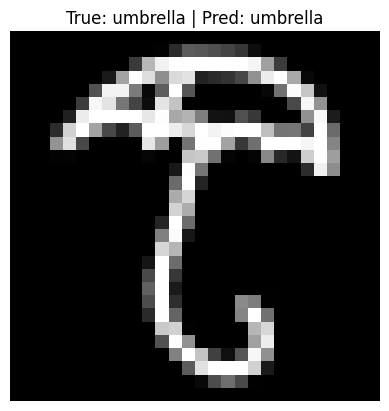

In [20]:
# infernce with unknow data from unpicked samples from data
import random
import matplotlib.pyplot as plt

def predict_random_from_disk(data_dir_img='image_folder', data_dir_stroke='strokes_data'):
    image_files  = sorted([f for f in os.listdir(data_dir_img) if f.endswith('.npy')])
    stroke_files = sorted([f for f in os.listdir(data_dir_stroke) if f.endswith('.npz')])
    class_names  = sorted(list(set(f[:-4] for f in image_files) & set(f[:-4] for f in stroke_files)))

    class_idx = random.randint(0, len(class_names)-1)
    class_name = class_names[class_idx]
    max_idx = 74999
    sample_idx = random.randint(0, max_idx)

    print(f"🔍 Class: {class_name} (index {class_idx}) | Sample #{sample_idx}")

    img_path = os.path.join(data_dir_img, f"{class_name}.npy")
    img_arr = np.load(img_path, mmap_mode='r')[sample_idx]
    img_arr = img_arr.reshape(1, 28, 28, 1).astype('float32') / 255.0

    stroke_path = os.path.join(data_dir_stroke, f"{class_name}.npz")
    stroke_arr = np.load(stroke_path, allow_pickle=True, encoding='latin1')['train'][sample_idx]
    stroke_arr = preprocess_stroke(stroke_arr)
    stroke_arr = stroke_arr.reshape(1, MAX_SEQ_LEN, STROKE_FEATURES)

    start = time.time()
    pred = model.predict([stroke_arr, img_arr])
    end = time.time()
    pred_class = np.argmax(pred)

    print("✅ True class:", class_name)
    print("🤖 Predicted class:", class_names[pred_class])
    print(f"⏱️ Inference time: {end - start:.5f} seconds")

    plt.imshow(img_arr[0].squeeze(), cmap='gray')
    plt.title(f"True: {class_name} | Pred: {class_names[pred_class]}")
    plt.axis("off")
    plt.show()

predict_random_from_disk()


In [ ]:
history

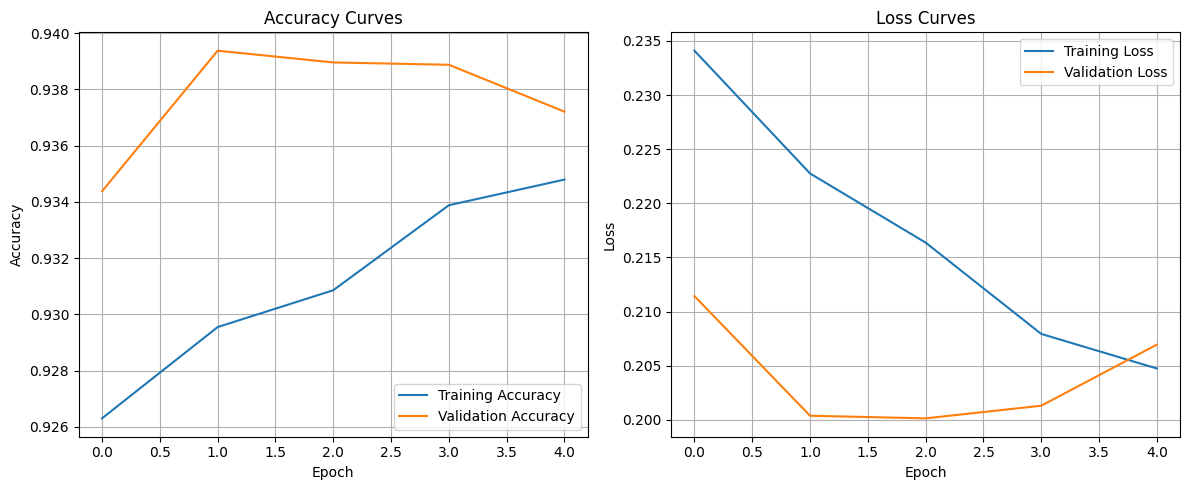

In [ ]:
# plots accruacy and  losss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
